IMPORT

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

DATASETS

In [99]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [101]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [102]:
df = df.dropna()

In [103]:
print(df["Education"].value_counts(), "\n")
print(df["Marital_Status"].value_counts())

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64 

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [104]:
# Age
df["Age"] = 2024 - df["Year_Birth"]

# Total spendings
df["Spent"] = df["MntFishProducts"] + df["MntFruits"] + df["MntGoldProds"] + df["MntMeatProducts"] + df["MntSweetProducts"] + df["MntWines"]

# Children status
df["Children"] = df["Kidhome"] + df["Teenhome"]

# Simplify material status
df["Living_With"] = df["Marital_Status"].replace({
    "Married": "Partner",
    "Together": "Partner",
    "Absurd": "Alone",
    "Widow": "Alone",
    "YOLO": "Alone",
    "Divorced": "Alone",
    "Single": "Alone"
    })

# Parenthood
df["Is_Parent"] = np.where(df.Children > 0, 1, 0)

# Family size
df["Family_Size"] = df["Living_With"].replace({"Partner": 2, "Alone": 1}) + df["Children"]

# Simplify education status
df["Education"] = df["Education"].replace({
    "Basic": "Undergraduate",
    "2n Cycle": "Undergraduate",
    "Graduation": "Graduate",
    "Master": "Postgraduate",
    "PhD": "Postgraduate"
})

# Rename and drop 
df = df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"GoldProds"})

df = df.drop(["Z_CostContact", "Z_Revenue", "ID", "Year_Birth", "Dt_Customer", "Marital_Status", "Kidhome", "Teenhome", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1","AcceptedCmp2", "Complain", "Response"], axis=1)
df.head()

C:\Users\cgtra\AppData\Local\Temp\ipykernel_17184\3048748644.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Family_Size"] = df["Living_With"].replace({"Partner": 2, "Alone": 1}) + df["Children"]


,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,GoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Children,Living_With,Is_Parent,Family_Size
0,Graduate,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,67,1617,0,Alone,0,1
1,Graduate,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,70,27,2,Alone,1,3
2,Graduate,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,59,776,0,Partner,0,2
3,Graduate,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,40,53,1,Partner,1,3
4,Postgraduate,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,43,422,1,Partner,1,3


In [105]:
df.describe()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,GoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Children,Is_Parent,Family_Size
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,55.179603,607.075361,0.947202,0.714350,2.592509
std,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,11.985554,602.900476,0.749062,0.451825,0.905722
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,0.000000,1.000000
25%,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,47.000000,69.000000,0.000000,0.000000,2.000000
50%,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,54.000000,396.500000,1.000000,1.000000,3.000000
75%,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,65.000000,1048.000000,1.000000,1.000000,3.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,131.000000,2525.000000,3.000000,1.000000,5.000000


<Figure size 640x480 with 0 Axes>

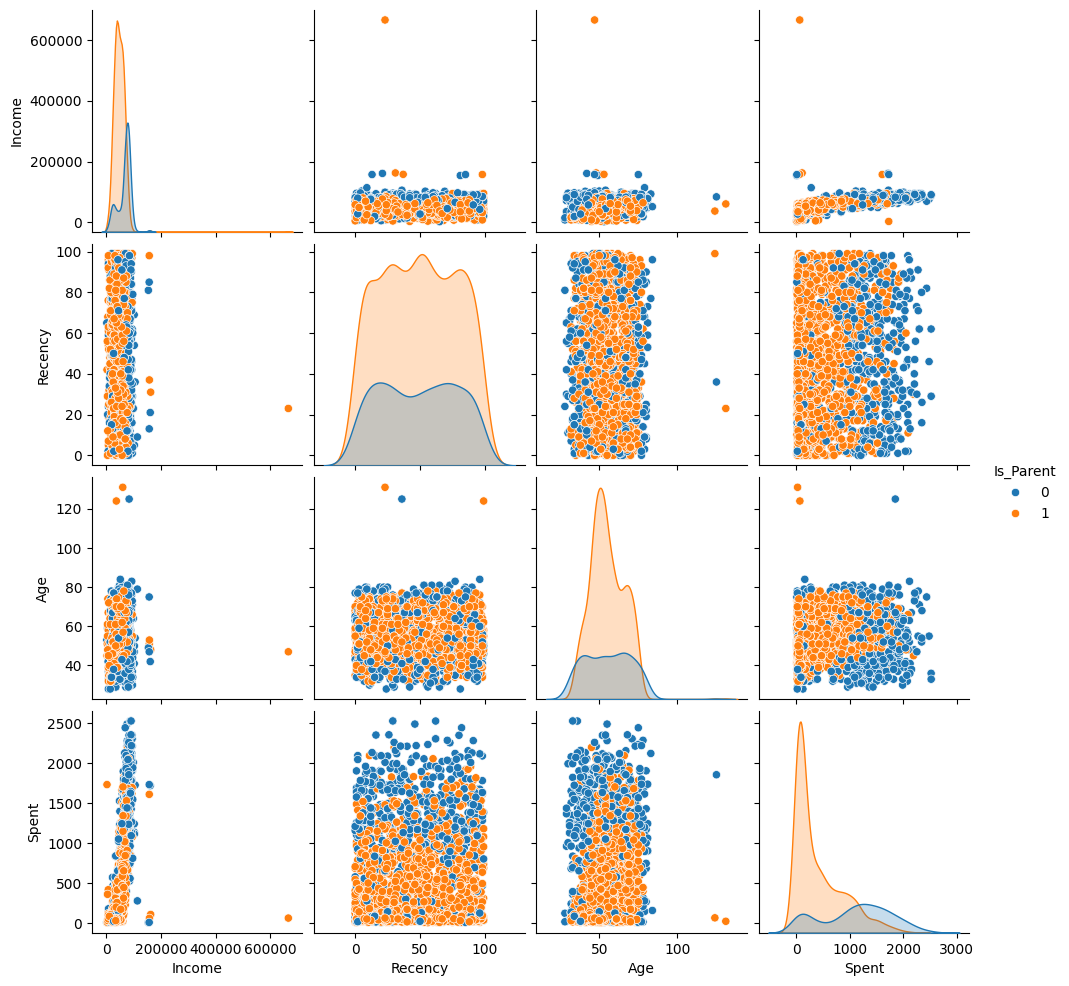

In [106]:
to_plot = ["Income", "Recency", "Age", "Spent", "Is_Parent"]
plt.figure()
sns.pairplot(df[to_plot], hue = "Is_Parent")

In [107]:
# Handle outliers:
df = df[(df["Age"] < 100)]
df = df[(df["Income"] < 600000)]
print(len(df))

2212


<Axes: >

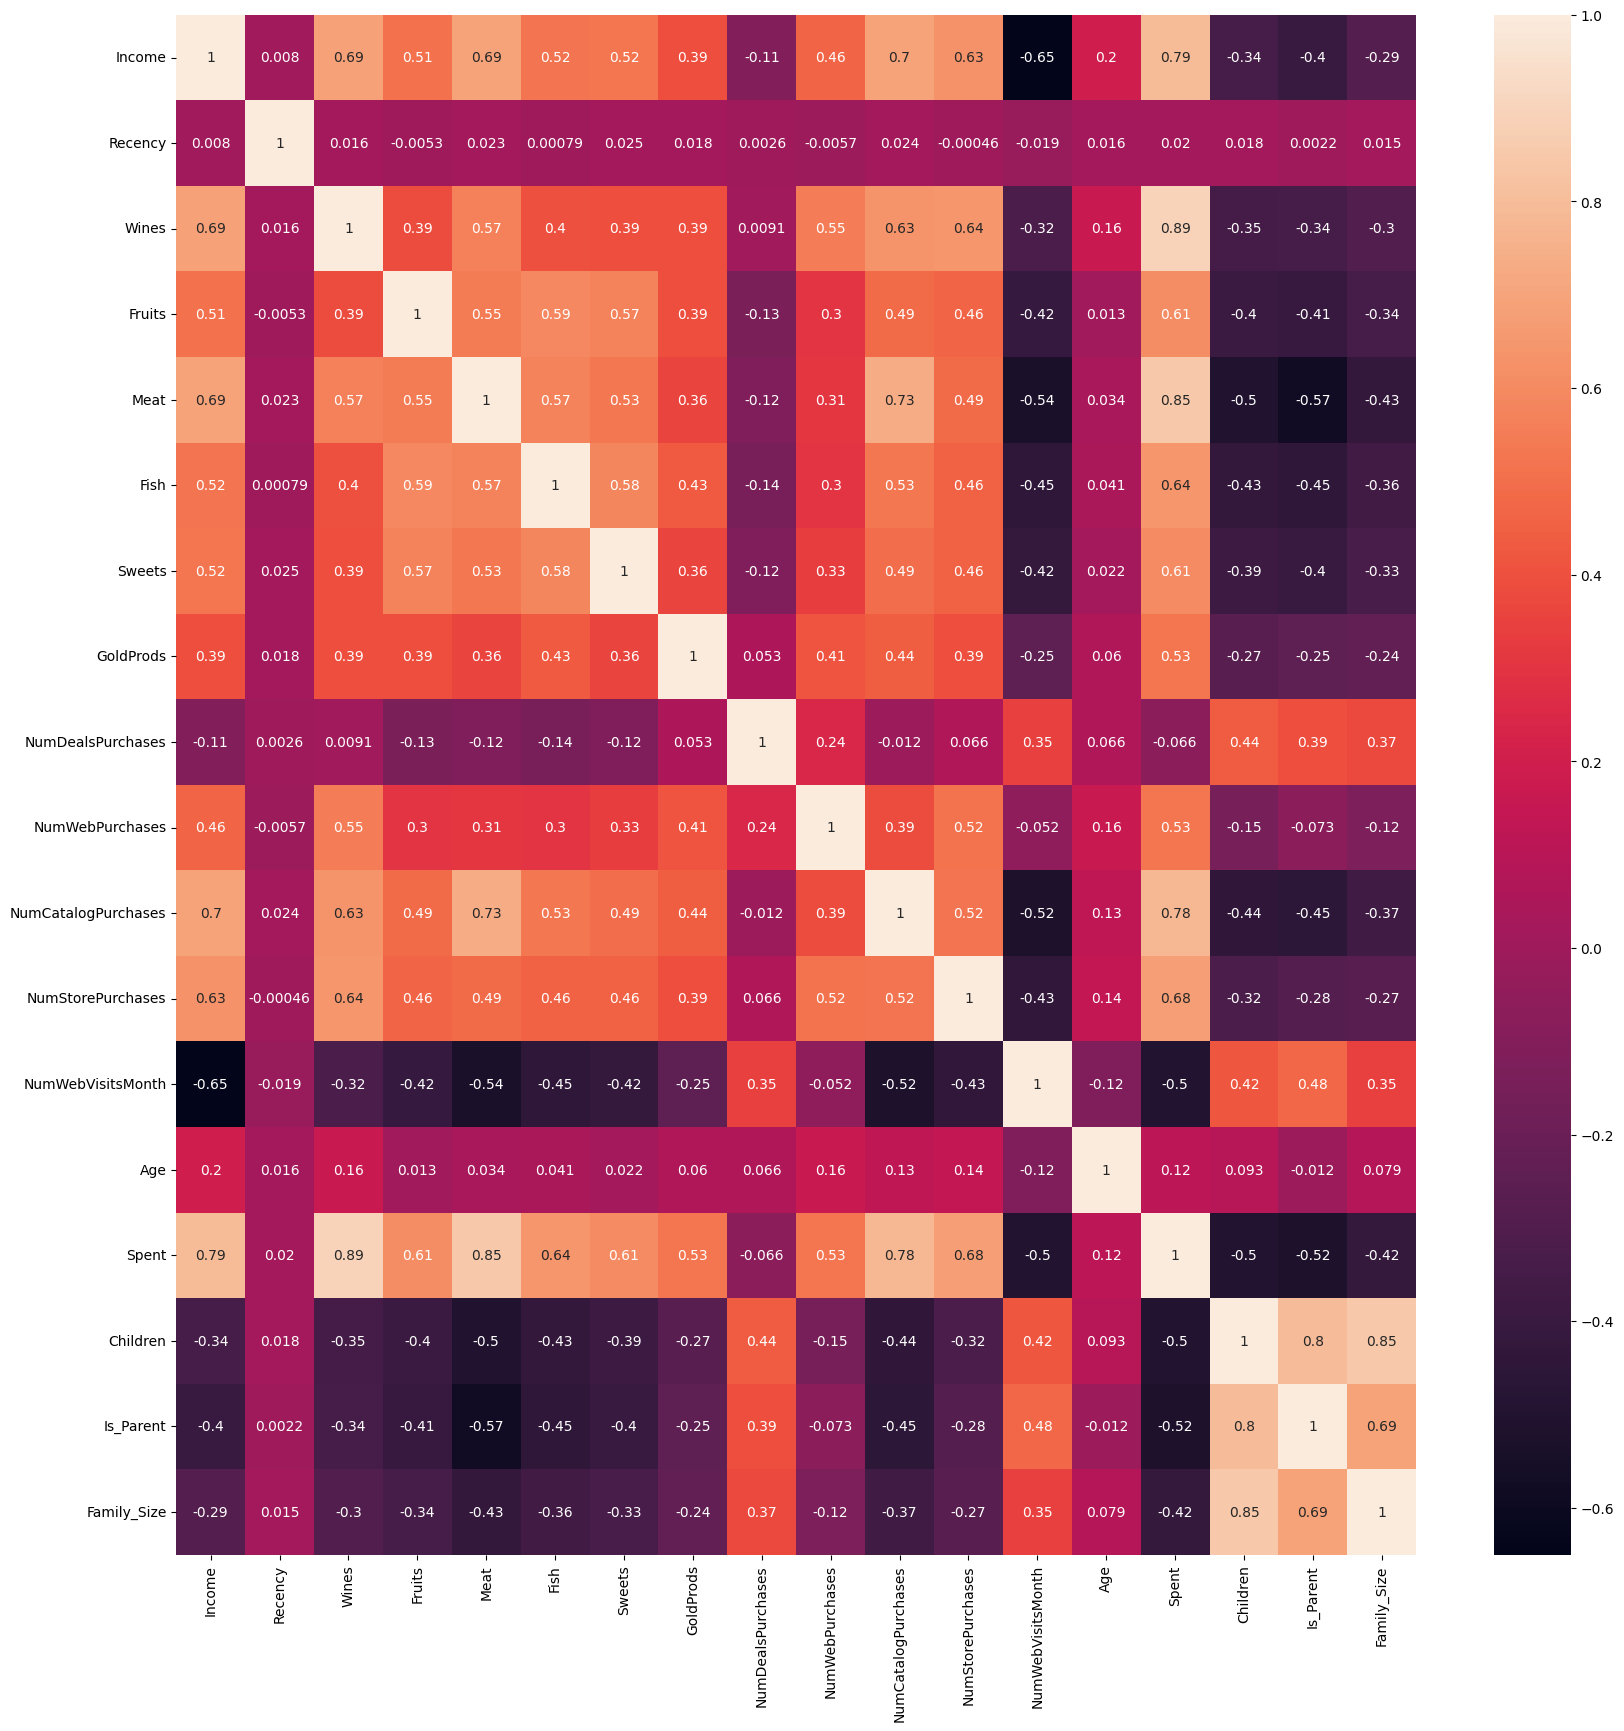

In [108]:
data = df.drop(["Education","Living_With"],axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)

Data Preprocessing

In [109]:
# Convert categorical features into numerical features
i = (df.dtypes == 'object')
object_cols = list(i[i].index)

label_encoder = LabelEncoder()
for i in object_cols:
    df[i] = df[[i]].apply(label_encoder.fit_transform)

In [113]:
scaler = StandardScaler()
scaler_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaler_df.head()

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,GoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Children,Living_With,Is_Parent,Family_Size
0,-0.893586,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.018352,1.676245,-1.264598,-1.349603,-1.581139,-1.758359
1,-0.893586,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,1.274785,-0.963297,1.404572,-1.349603,0.632456,0.449070
2,-0.893586,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,0.334530,0.280110,-1.264598,0.740959,-1.581139,-0.654644
3,-0.893586,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.289547,-0.920135,0.069987,0.740959,0.632456,0.449070
4,0.571657,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-1.033114,-0.307562,0.069987,0.740959,0.632456,0.449070


Dimension reduction

In [116]:
pca = PCA(n_components=3)
PCA_df = pd.DataFrame(pca.fit_transform(scaler_df), columns=(["col1", "col2", "col3"]))
PCA_df.describe()

,col1,col2,col3
count,2.212000e+03,2.212000e+03,2.212000e+03
mean,4.497106e-17,6.424437e-18,5.099397e-17
std,2.780651e+00,1.532661e+00,1.143459e+00
min,-5.730614e+00,-4.217427e+00,-3.192381e+00
25%,-2.451761e+00,-1.055728e+00,-8.901402e-01
50%,-9.018371e-01,-1.586286e-01,-2.203008e-01
75%,2.307847e+00,1.062252e+00,8.738309e-01
max,7.408891e+00,5.880549e+00,5.229408e+00


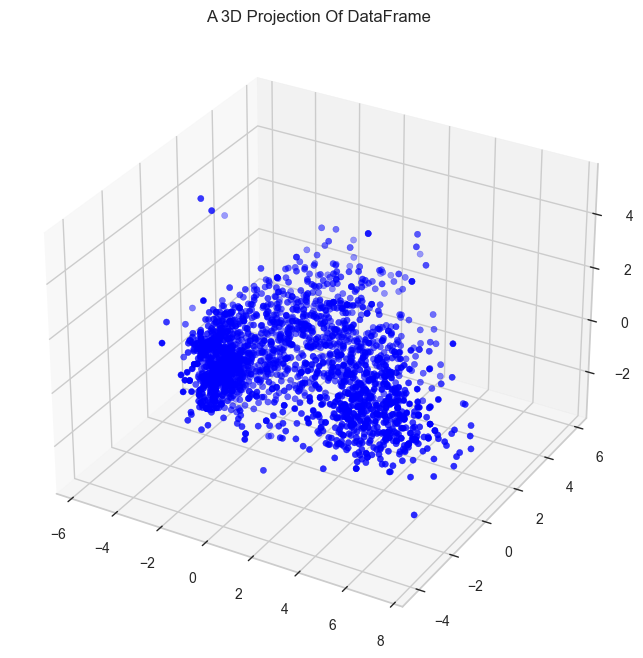

In [133]:
x = PCA_df["col1"]
y = PCA_df["col2"]
z = PCA_df["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='blue', marker='o')
ax.set_title("A 3D Projection Of DataFrame")
plt.show()

Clustering

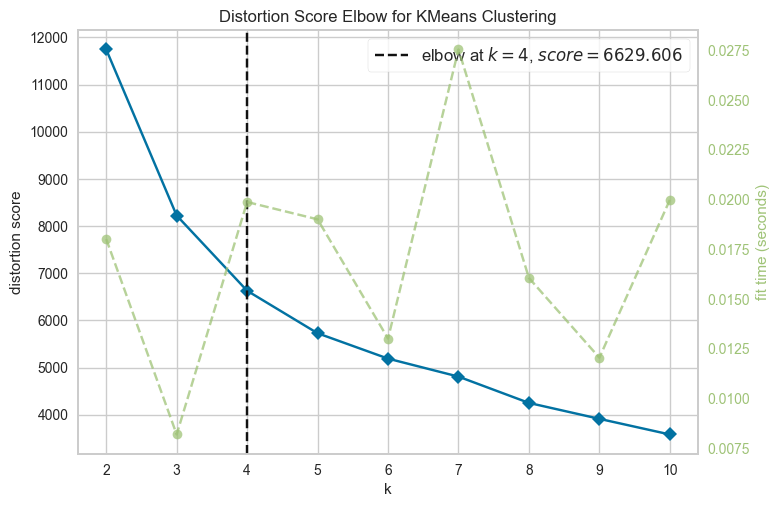

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [131]:
# Number of clusters 
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

In [132]:
# Kmean
kmeans = KMeans(n_clusters=4,init='k-means++' ,random_state=27)
yhat_Kmeans = kmeans.fit_predict(PCA_df)
PCA_df["Cluster"] = yhat_Kmeans
df["Cluster"] = yhat_Kmeans

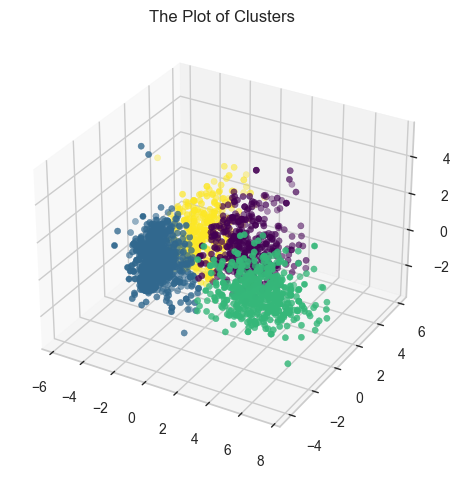

In [138]:
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, c=PCA_df["Cluster"] , marker='o', cmap='viridis')
ax.set_title("The Plot of Clusters")
plt.show()

Review

C:\Users\cgtra\AppData\Local\Temp\ipykernel_17184\2952184220.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df["Cluster"], palette=pal)


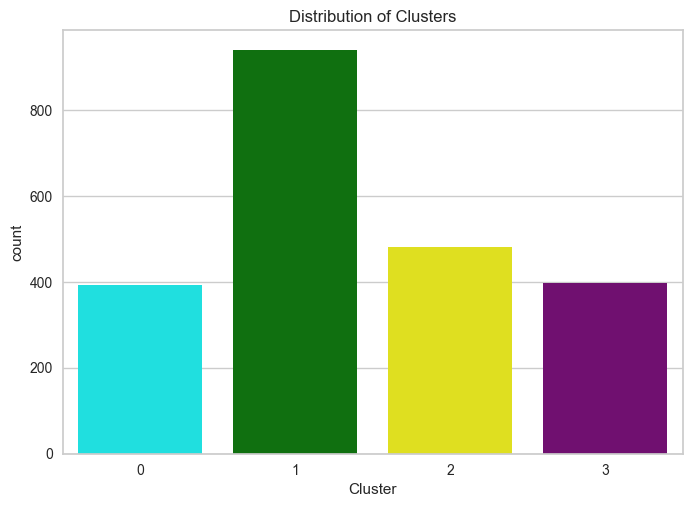

In [141]:
pal = ["cyan", "green", "yellow", "purple"]
pl = sns.countplot(x=df["Cluster"], palette=pal)
pl.set_title("Distribution of Clusters")
plt.show()

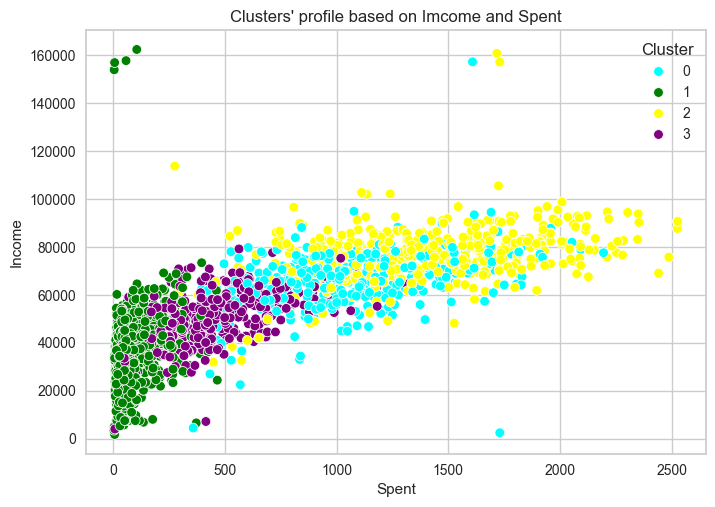

In [144]:
pl = sns.scatterplot(data=df, x = df["Spent"], y = df["Income"], hue = df["Cluster"], palette=pal)
pl.set_title("Clusters' profile based on Imcome and Spent")
plt.show()

c:\Users\cgtra\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\cgtra\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 81.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\cgtra\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\cgtra\AppData\Local\Temp\ipykernel_17184\718378074.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same

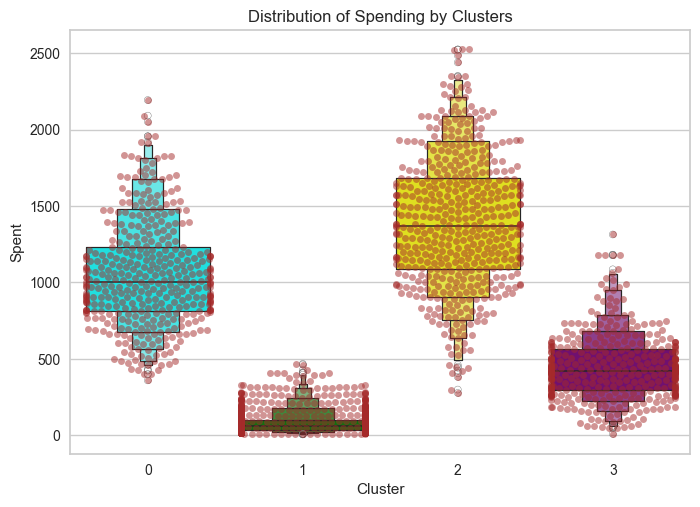

In [153]:
plt.figure()
pl = sns.swarmplot(x=df["Cluster"], y=df["Spent"], color="brown", alpha=0.5)
pl = sns.boxenplot(x=df["Cluster"], y=df["Spent"], palette=pal)
pl.set_title("Distribution of Spending by Clusters")
plt.show()

<Figure size 800x550 with 0 Axes>

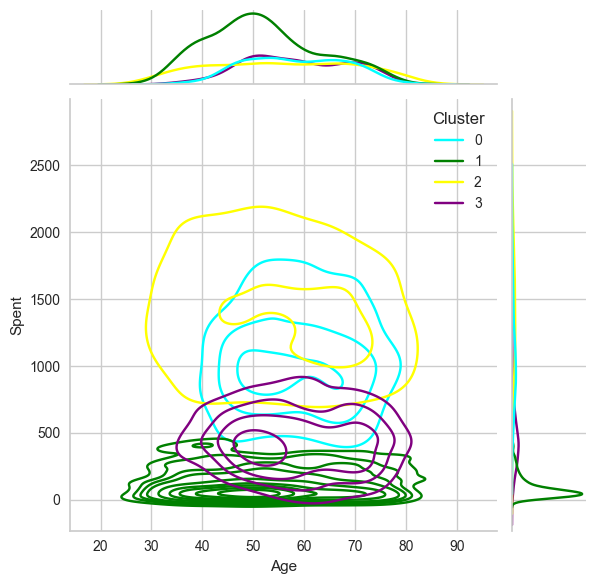

<Figure size 800x550 with 0 Axes>

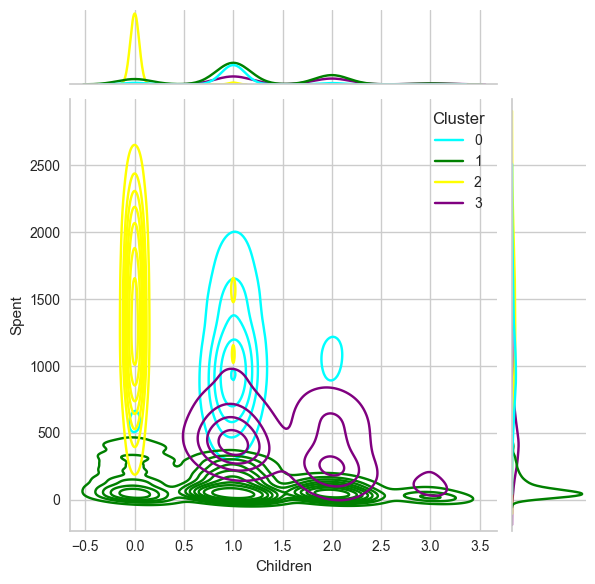

<Figure size 800x550 with 0 Axes>

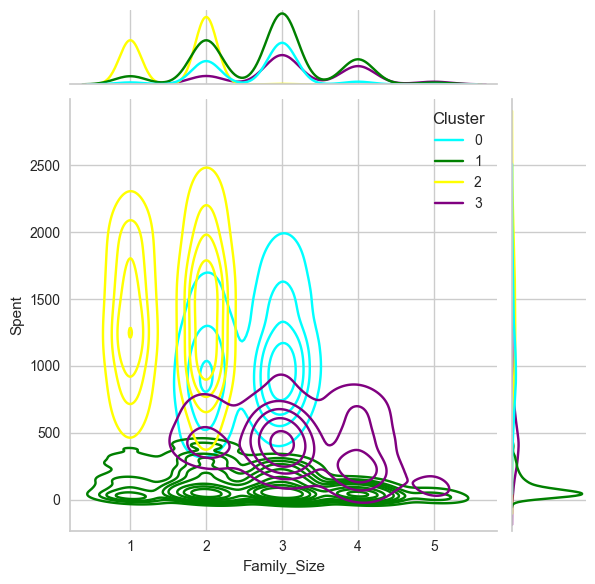

c:\Users\cgtra\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

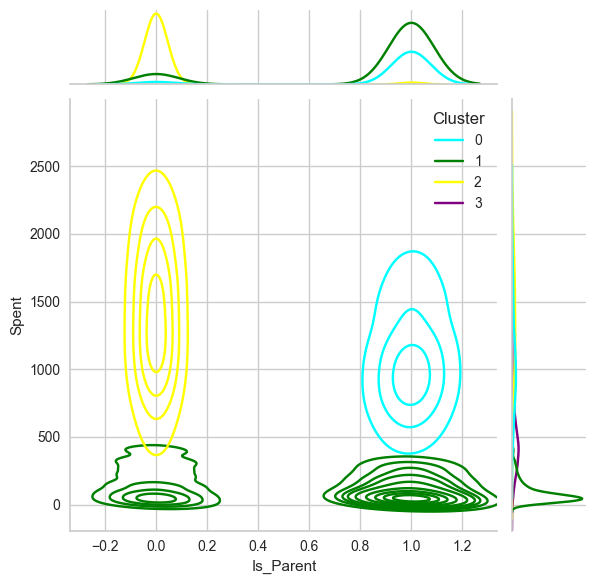

<Figure size 800x550 with 0 Axes>

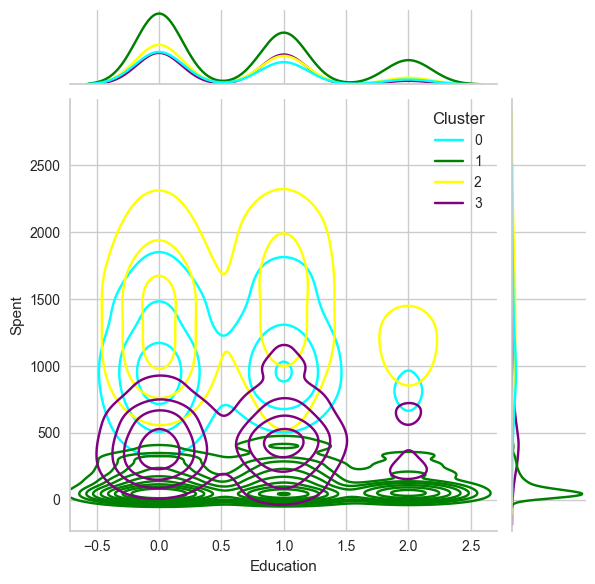

<Figure size 800x550 with 0 Axes>

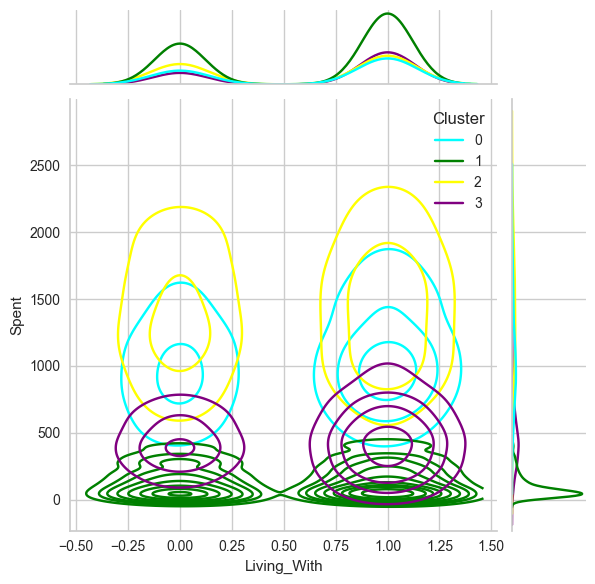

In [162]:
Target = ["Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]
for i in Target:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue=df["Cluster"], kind="kde", palette=pal)
    plt.show()

Profiling the cluster:
* Cluster 0:
    - Are definitely parents 
    - They majority have 1 children over 2 children
    - Slightly majority of couples
    - Span 40-80 ages
    - A high income and spending group
* Cluster 1: 
    - majority are parent
    - At range 0 to 3 children
    - Span 30-80 ages
    - A low income and spending group 
* Cluster 2:
    - Are definitely not a parent
    - They minority have 1 children
    - Span 30=80 ages
    - A high income and spending group
* Cluster 3:
    - they majority have 1,2 children over 3 children
    - Span 35-80 ages
    - A low income and spending group 